<a href="https://colab.research.google.com/github/RifatMuhtasim/Basic_Web_Development_Series/blob/main/Qualifier_Round/Problem3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import os
import zipfile

# Replace 'output_path' with the path where you want to save the file
output_path = 'Qualifier_Dataset.zip'

if os.path.exists(output_path):
    print("File exists!")

else:
    print("File does not exist.")
    # Replace 'file_id' with the ID of your file in Google Drive
    file_id = '1FouGxOPT5yk2cXoEk6PeemAeWjA_VkLa'
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

    # Path to your .zip file (Must Change. Same as the Output Path)
    zip_file_path = '/content/Qualifier_Dataset.zip'

    # Extract the contents of the .zip file to the root directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/')

    # List the contents of the root directory
    extracted_files = !ls -a /content/
    print("Files extracted to root directory:", extracted_files)

File does not exist.


Downloading...
From: https://drive.google.com/uc?id=1FouGxOPT5yk2cXoEk6PeemAeWjA_VkLa
To: /content/Qualifier_Dataset.zip
100%|██████████| 17.1M/17.1M [00:00<00:00, 17.7MB/s]


Files extracted to root directory: [" .\t    'problem 1.csv'   Qualifier_Dataset.zip\t'sample submission 3.csv'", " ..\t    'problem 2.csv'   sample_data", " boxes.csv  'problem 3.csv'  'sample submission 1.csv'", " .config     purchase.csv    'sample submission 2.csv'"]


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Importing necessary libraries</div>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
boxes = pd.read_csv("/content/boxes.csv")
purchase = pd.read_csv("/content/purchase.csv")

problem3 = pd.read_csv("/content/problem 3.csv")
sample_submission3 = pd.read_csv("/content/sample submission 3.csv")

In [ ]:
print("Boxes Dataset Shape:", boxes.shape)
print("Purchase Dataset Shape", purchase.shape)

Boxes Dataset Shape: (290, 6)
Purchase Dataset Shape (2455864, 4)


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Problem Statement</div>


<div style='border: 2px solid lightblue; background-color: #A3FFD6; color: black; padding: 20px; border-radius: 10px;'>

**This problem entails predicting the quantity of meat purchased by customers who acquired at least one box of milk and/or meat during the first 15 days of March 2019 in the magical realm of Neverland. Grassland Gus's farm, Moo Meadows.**

<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Hello, Datasets!</div>


### Boxes

In [ ]:
boxes.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


<div style='border: 2px solid lightblue; background-color: #A3FFD6; color: black; padding: 20px; border-radius: 10px;'>
    
- **BOX_ID -** A unique identifier for each Enchanted Box containing milk and meat products sold by Grassland Gus at Moo Meadows.
- **QUALITY -** The perceived quality or grade of the products contained within the Enchanted Box (Premium & Standard)
- **DELIVERY_OPTION -** The method or mode of delivery available for the Enchanted Box (Delivery from Collection Point, Home Delivery - CoD,Home Delivery - Digital Payment)
- **MILK -** The quantity of milk, measured in cauldrons contained within the Enchanted Box.
- **MEAT -** The quantity of meat, measured in stones contained within the Enchanted Box.
- **UNIT_PRICE -** The price of the Enchanted Box, representing the cost for purchasing the entire package of milk and meat products.

## Purchase

In [ ]:
purchase.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


<div style='border: 2px solid lightblue; background-color: #9aff70; color: black; padding: 20px; border-radius: 10px;'>

- **PURCHASE_DATE -** The date on which the purchase of an Enchanted Box or boxes containing milk and meat products was made by a customer.
- **MAGIC_KEY -** A unique identifier assigned to each customer in Neverland, serving as a key to track their purchases and interactions within the enchanted realm.
- **BOX_ID -** A distinctive identifier for each Enchanted Box purchased by a customer, linking the purchase to the specific combination of milk and meat products contained within.
- **BOX_COUNT -** The quantity or number of Enchanted Boxes purchased by a customer during a single transaction, indicating the volume of milk and meat products acquired in one magical exchange.

In [ ]:
purchase = purchase.dropna()
purchase = purchase.drop_duplicates()

**Although boxes is free of null values but purchase has 47 null values for BOX_ID and BOX_COUNT column. We will drop them!**

In [ ]:
purchase['PURCHASE_DATE'] = pd.to_datetime(purchase['PURCHASE_DATE'], format="%d/%m/%Y")
purchase.sort_values('PURCHASE_DATE', ascending=True, inplace=True)
purchase['BOX_ID'] = purchase['BOX_ID'].astype(int)
purchase['BOX_COUNT'] = purchase['BOX_COUNT'].astype(int)
purchase.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
2074896,2018-10-01,2BEA76FD4EB,118,1
2087657,2018-10-01,2C9379075DE,118,1
2087656,2018-10-01,2C2E44B20FB,118,1
2087655,2018-10-01,28DABAAEB4C,233,1
2087654,2018-10-01,2CDF00D4011,31,1


In [ ]:
sample_submission3.head()

,MAGIC_KEY,MEAT
0,2BCFE9C06A7,25.2
1,2C2A872B5A2,25.2
2,2C6A897671B,25.2
3,2C6F1287F53,25.2
4,2C658198CC9,25.2


In [ ]:
problem3.head()

,MAGIC_KEY
0,2BCFE9C06A7
1,2C2A872B5A2
2,2C6A897671B
3,2C6F1287F53
4,2C658198CC9


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Exploratory Data Analysis(EDA)</div>


**There are some invalid values in BOX_ID Column. We will remove those as well.**

In [ ]:
unique_box_ids = purchase['BOX_ID'].unique()
sorted_unique_box_ids = np.sort(unique_box_ids)
purchase =  purchase[purchase['BOX_ID'] != 11111111]

In [ ]:
dataset = pd.merge(purchase, boxes, on='BOX_ID')
dataset = dataset.sort_values([ 'MAGIC_KEY', 'PURCHASE_DATE'], ascending=True)
dataset.head(5)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
1420020,2018-11-01,249670911D8,245,1,Standard,Delivery from Collection Point,0.0,2.4,13.96
120588,2019-02-02,249670911D8,231,1,Standard,Delivery from Collection Point,8.5,0.0,10.14
501652,2018-10-12,249751FC4DD,260,1,Standard,Delivery from Collection Point,10.0,1.8,17.98
1130021,2018-10-19,24978027606,27,1,Premium,Home Delivery - CoD,0.0,2.9,15.96
1481547,2018-11-30,24979164422,246,1,Standard,Delivery from Collection Point,0.0,2.5,13.96


In [ ]:
dataset['MILK'] = dataset['MILK'] * dataset['BOX_COUNT']
dataset['MEAT'] = dataset['MEAT'] * dataset['BOX_COUNT']
dataset['UNIT_PRICE'] = dataset['UNIT_PRICE'] * dataset['BOX_COUNT']

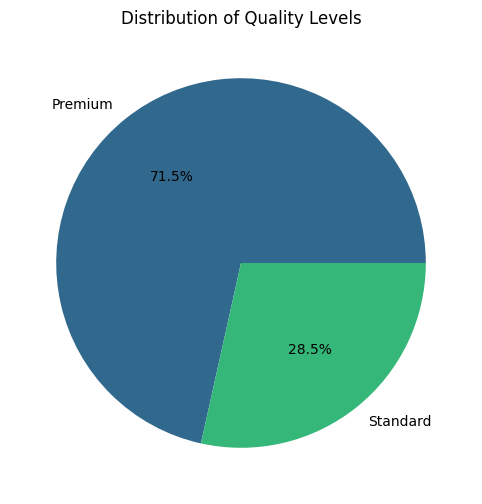

In [ ]:
quality_counts = dataset['QUALITY'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(quality_counts)))
plt.title('Distribution of Quality Levels')
plt.show()

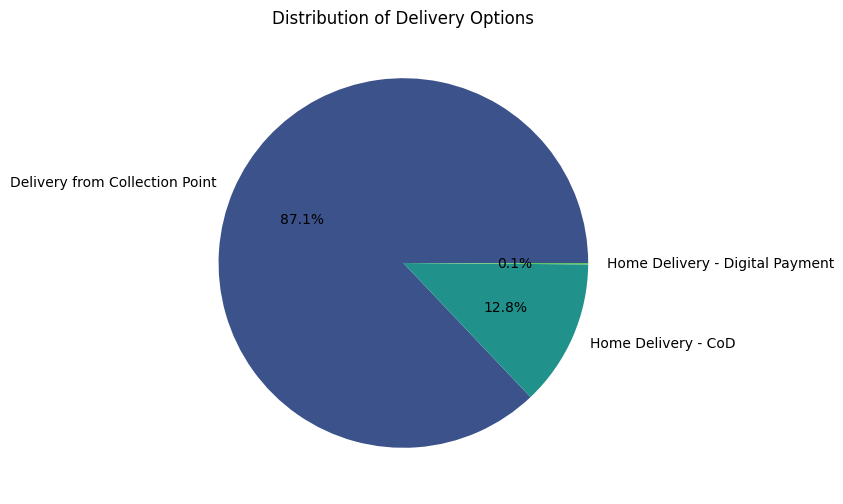

In [ ]:
delivery_counts = dataset['DELIVERY_OPTION'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(delivery_counts.values, labels=delivery_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(delivery_counts)))
plt.title('Distribution of Delivery Options')
plt.show()

In [ ]:
df = dataset.copy()
df['PURCHASE_MONTH'] = df['PURCHASE_DATE'].dt.month
october = df[df['PURCHASE_MONTH'] == 10]
november = df[df['PURCHASE_MONTH'] == 11]
december = df[df['PURCHASE_MONTH'] == 12]
january = df[df['PURCHASE_MONTH'] == 1]
february = df[df['PURCHASE_MONTH'] == 2]
october_mean = october['MEAT'].mean()
november_mean = november['MEAT'].mean()
december_mean = december['MEAT'].mean()
january_mean = january['MEAT'].mean()
february_mean = february['MEAT'].mean()
print("Mean value of MEAT for October:", october_mean)
print("Mean value of MEAT for November:", november_mean)
print("Mean value of MEAT for December:", december_mean)
print("Mean value of MEAT for January:", january_mean)
print("Mean value of MEAT for February:", february_mean)

Mean value of MEAT for October: 1.827428290510418
Mean value of MEAT for November: 1.9824776200758925
Mean value of MEAT for December: 2.152469582275411
Mean value of MEAT for January: 2.1120707576516287
Mean value of MEAT for February: 2.1645964645459386


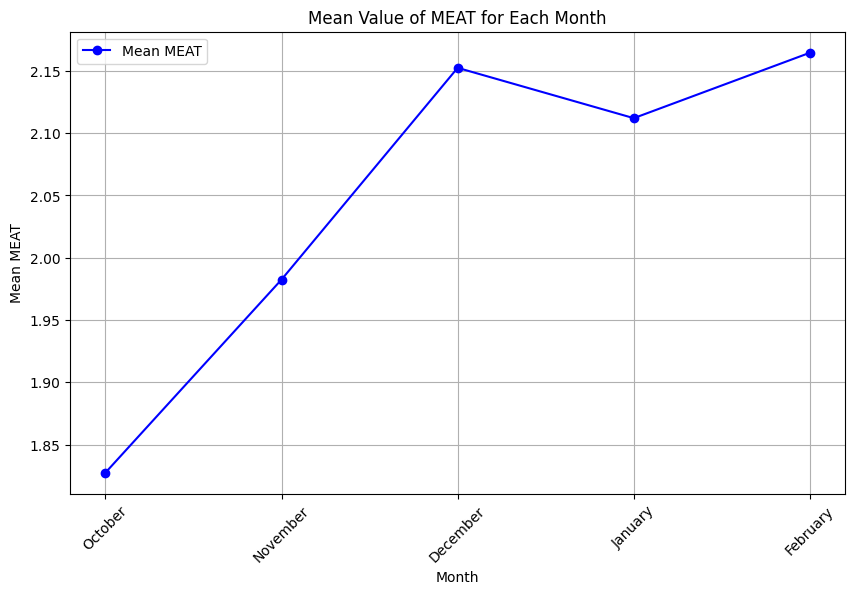

In [ ]:
mean_values = pd.DataFrame({
    'Month': ['October', 'November', 'December', 'January', 'February'],
    'MEAT_mean': [october_mean, november_mean, december_mean, january_mean, february_mean]
})

plt.figure(figsize=(10, 6))
plt.plot(mean_values['Month'], mean_values['MEAT_mean'], marker='o', color='blue', label='Mean MEAT')
plt.title('Mean Value of MEAT for Each Month')
plt.xlabel('Month')
plt.ylabel('Mean MEAT')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Feature Engineering</div>


In [ ]:
customer_grp = dataset.groupby('MAGIC_KEY')
customer_intervals = customer_grp['PURCHASE_DATE'].diff().dt.days
dataset['PURCHASE_INTERVAL'] = customer_intervals
dataset['PURCHASE_INTERVAL'] = dataset['PURCHASE_INTERVAL'].fillna(0)
dataset['PURCHASE_INTERVAL'] = dataset['PURCHASE_INTERVAL'].astype(int)
dataset.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE_INTERVAL
1420020,2018-11-01,249670911D8,245,1,Standard,Delivery from Collection Point,0.0,2.4,13.96,0
120588,2019-02-02,249670911D8,231,1,Standard,Delivery from Collection Point,8.5,0.0,10.14,93
501652,2018-10-12,249751FC4DD,260,1,Standard,Delivery from Collection Point,10.0,1.8,17.98,0
1130021,2018-10-19,24978027606,27,1,Premium,Home Delivery - CoD,0.0,2.9,15.96,0
1481547,2018-11-30,24979164422,246,1,Standard,Delivery from Collection Point,0.0,2.5,13.96,0


In [ ]:
train_dataset = dataset.copy()

test_dataset  = pd.merge(problem3, dataset, on="MAGIC_KEY", how="left")
test_dataset.fillna(test_dataset.mode().iloc[0], inplace=True)
test_dataset['MAGIC_KEY'].nunique()

5379

In [ ]:
mask = ((train_dataset['PURCHASE_DATE'] >= pd.to_datetime('2019-02-01')) & (train_dataset['PURCHASE_DATE'] <= pd.to_datetime('2019-02-15')))
train_dataset['PURCHASE_IN_FEB'] = 0
train_dataset.loc[mask, 'PURCHASE_IN_FEB'] =1

In [ ]:
def Train_customer_summary_in_feb(df):
    grouped = df.groupby('MAGIC_KEY')

    meat_agg = grouped.agg(
        MEAT_PURCHASE_IN_FEB = pd.NamedAgg(column='MEAT', aggfunc='sum'),
        NUM_OF_PURCHASE_IN_FEB =pd.NamedAgg(column='PURCHASE_DATE', aggfunc='size'),
        NUM_OF_BOX_PURCHASE_IN_FEB = pd.NamedAgg(column='BOX_COUNT', aggfunc='sum')
    )

    meat_agg.reset_index(inplace=True)
    meat_agg = meat_agg[['MAGIC_KEY',  'MEAT_PURCHASE_IN_FEB', 'NUM_OF_PURCHASE_IN_FEB', 'NUM_OF_BOX_PURCHASE_IN_FEB']]
    return meat_agg

In [ ]:
train_dataset_february = train_dataset[train_dataset['PURCHASE_IN_FEB'] == 1]
total_meat_in_february = Train_customer_summary_in_feb(train_dataset_february)
total_meat_in_february['PURCHASE_IN_FEB'] = 1
total_meat_in_february['PER_DAY_PURCHASE_PROBABILITY'] = total_meat_in_february['NUM_OF_PURCHASE_IN_FEB'] / 15
total_meat_in_february.head()

,MAGIC_KEY,MEAT_PURCHASE_IN_FEB,NUM_OF_PURCHASE_IN_FEB,NUM_OF_BOX_PURCHASE_IN_FEB,PURCHASE_IN_FEB,PER_DAY_PURCHASE_PROBABILITY
0,249670911D8,0.0,1,1,1,0.066667
1,2497E36D1BF,1.3,1,1,1,0.066667
2,2498CA210F2,2.5,1,1,1,0.066667
3,2498CF2157B,3.3,1,1,1,0.066667
4,2499B9E0C1C,0.0,2,2,1,0.133333


In [ ]:
train_dataset = train_dataset[train_dataset['PURCHASE_DATE'] < pd.to_datetime('2019-02-01')]
train_dataset = train_dataset.drop(['PURCHASE_IN_FEB'], axis="columns")
train_dataset.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,PURCHASE_INTERVAL
1420020,2018-11-01,249670911D8,245,1,Standard,Delivery from Collection Point,0.0,2.4,13.96,0
501652,2018-10-12,249751FC4DD,260,1,Standard,Delivery from Collection Point,10.0,1.8,17.98,0
1130021,2018-10-19,24978027606,27,1,Premium,Home Delivery - CoD,0.0,2.9,15.96,0
1481547,2018-11-30,24979164422,246,1,Standard,Delivery from Collection Point,0.0,2.5,13.96,0
486118,2018-10-03,2497B8B4FDA,260,1,Standard,Delivery from Collection Point,10.0,1.8,17.98,0


In [ ]:
def Customer_summary_info(df):
    grouped = df.groupby('MAGIC_KEY')

    # Calculate summary statistics
    customer_summary = grouped.agg(
        TOTAL_NUM_OF_PURCHASE=pd.NamedAgg(column='PURCHASE_DATE', aggfunc='size'),
        LAST_PURCHASE_DAY=pd.NamedAgg(column='PURCHASE_DATE', aggfunc='last'),
        TOTAL_PURCHASE_INTERVAL=pd.NamedAgg(column='PURCHASE_INTERVAL', aggfunc='sum'),
        BOX_ID=pd.NamedAgg(column='BOX_ID', aggfunc=lambda x: x.iloc[-1]),
        TOTAL_NUM_OF_BOX_COUNT=pd.NamedAgg(column='BOX_COUNT', aggfunc='sum'),
        QUALITY = pd.NamedAgg(column='QUALITY', aggfunc=lambda x: x.mode().iat[0]),
        DELIVERY_OPTION = pd.NamedAgg(column='DELIVERY_OPTION', aggfunc=lambda x: x.mode().iat[0]),
        TOTAL_AMOUNT_OF_PURCHASED_MILK = pd.NamedAgg(column='MILK', aggfunc='sum'),
        TOTAL_AMOUNT_OF_PURCHASED_MEAT = pd.NamedAgg(column='MEAT', aggfunc='sum'),
        TOTAL_PURCHASE_AMOUNT = pd.NamedAgg(column='UNIT_PRICE', aggfunc='sum')
    )


    customer_summary.reset_index(inplace=True)
    customer_summary = customer_summary[['MAGIC_KEY',
                                        'TOTAL_NUM_OF_PURCHASE',
                                        'LAST_PURCHASE_DAY',
                                        'TOTAL_PURCHASE_INTERVAL',
                                        'BOX_ID',
                                        'TOTAL_NUM_OF_BOX_COUNT',
                                        'QUALITY',
                                        'DELIVERY_OPTION',
                                        'TOTAL_AMOUNT_OF_PURCHASED_MILK',
                                        'TOTAL_AMOUNT_OF_PURCHASED_MEAT',
                                        'TOTAL_PURCHASE_AMOUNT'
                                        ]]

    return customer_summary

In [ ]:
train_dataset_copy = train_dataset.copy()
test_dataset_copy = test_dataset.copy()

test_dataset_customer_summary = Customer_summary_info(test_dataset_copy)

train_dataset_customer_summary = Customer_summary_info(train_dataset_copy)
train_dataset_customer_summary.head()

,MAGIC_KEY,TOTAL_NUM_OF_PURCHASE,LAST_PURCHASE_DAY,TOTAL_PURCHASE_INTERVAL,BOX_ID,TOTAL_NUM_OF_BOX_COUNT,QUALITY,DELIVERY_OPTION,TOTAL_AMOUNT_OF_PURCHASED_MILK,TOTAL_AMOUNT_OF_PURCHASED_MEAT,TOTAL_PURCHASE_AMOUNT
0,249670911D8,1,2018-11-01,0,245,1,Standard,Delivery from Collection Point,0.0,2.4,13.96
1,249751FC4DD,1,2018-10-12,0,260,1,Standard,Delivery from Collection Point,10.0,1.8,17.98
2,24978027606,1,2018-10-19,0,27,1,Premium,Home Delivery - CoD,0.0,2.9,15.96
3,24979164422,1,2018-11-30,0,246,1,Standard,Delivery from Collection Point,0.0,2.5,13.96
4,2497B8B4FDA,2,2018-11-01,29,255,2,Standard,Delivery from Collection Point,10.0,5.4,33.94


In [ ]:
def Customer_summary_trans(customer_summary):
    customer_summary['PREMIUM_QUALITY'] = customer_summary['QUALITY'].apply(lambda x: 1 if x== 'Premium' else 0)
    customer_summary.drop('QUALITY', axis='columns', inplace=True)

    customer_summary = pd.get_dummies(data=customer_summary, columns=['DELIVERY_OPTION'], drop_first=True)
    customer_summary['DELIVERY_OPTION_Home Delivery - CoD'] = customer_summary['DELIVERY_OPTION_Home Delivery - CoD'].astype(int)
    customer_summary['DELIVERY_OPTION_Home Delivery - Digital Payment'] = customer_summary['DELIVERY_OPTION_Home Delivery - Digital Payment'].astype(int)

    customer_summary['AVG_PURCHASE_INTERVAL'] = customer_summary['TOTAL_PURCHASE_INTERVAL'] / np.where(customer_summary['TOTAL_NUM_OF_PURCHASE'] != 1, (customer_summary['TOTAL_NUM_OF_PURCHASE'] - 1), 1)
    customer_summary['AVG_PURCHASE_INTERVAL'] =  customer_summary['AVG_PURCHASE_INTERVAL'].astype(int)
    customer_summary = customer_summary.drop(['TOTAL_PURCHASE_INTERVAL'], axis="columns")
    return customer_summary

In [ ]:
train_dataset_customer_info = Customer_summary_trans(train_dataset_customer_summary)
test_dataset_customer_info = Customer_summary_trans(test_dataset_customer_summary)
test_df = test_dataset_customer_info.copy()

In [ ]:
train_dataset_info = pd.merge(train_dataset_customer_info, total_meat_in_february, on='MAGIC_KEY', how="left")
train_dataset_info.fillna(0, inplace=True)

train_df = train_dataset_info[train_dataset_info['PURCHASE_IN_FEB'] == 1]
train_df = train_df.drop('PURCHASE_IN_FEB', axis="columns")
train_df.head()

,MAGIC_KEY,TOTAL_NUM_OF_PURCHASE,LAST_PURCHASE_DAY,BOX_ID,TOTAL_NUM_OF_BOX_COUNT,TOTAL_AMOUNT_OF_PURCHASED_MILK,TOTAL_AMOUNT_OF_PURCHASED_MEAT,TOTAL_PURCHASE_AMOUNT,PREMIUM_QUALITY,DELIVERY_OPTION_Home Delivery - CoD,DELIVERY_OPTION_Home Delivery - Digital Payment,AVG_PURCHASE_INTERVAL,MEAT_PURCHASE_IN_FEB,NUM_OF_PURCHASE_IN_FEB,NUM_OF_BOX_PURCHASE_IN_FEB,PER_DAY_PURCHASE_PROBABILITY
0,249670911D8,1,2018-11-01,245,1,0.0,2.4,13.96,0,0,0,0,0.0,1.0,1.0,0.066667
5,2497E36D1BF,1,2018-10-11,37,1,12.0,2.2,15.98,1,1,0,0,1.3,1.0,1.0,0.066667
8,2498CA210F2,1,2018-12-06,246,1,0.0,2.5,13.96,0,0,0,0,2.5,1.0,1.0,0.066667
10,249BD4201E6,1,2019-01-14,108,1,0.0,3.6,15.96,1,0,0,0,4.0,1.0,1.0,0.066667
15,249DA1DC108,1,2019-01-02,255,1,0.0,3.6,15.96,0,0,0,0,3.6,1.0,1.0,0.066667


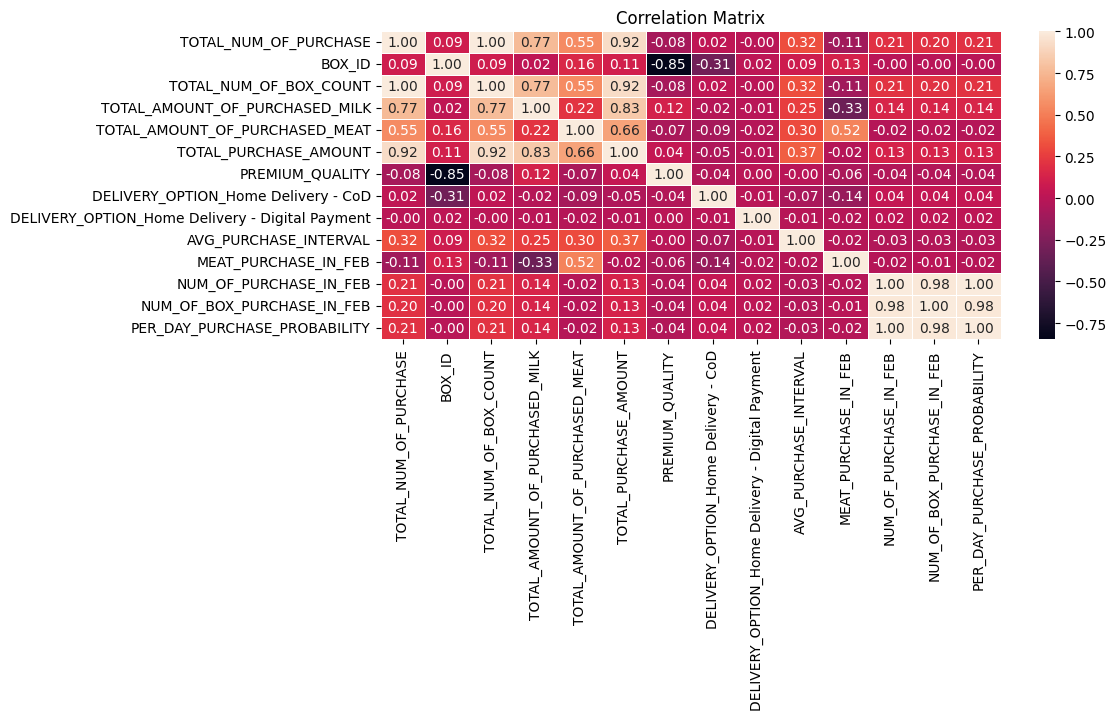

In [ ]:
# Visualize Correlation using Heatmap
plt.figure(figsize=(10, 4))
numerical_df = train_df.select_dtypes(include=['int', 'float'])
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Checking for Outliers

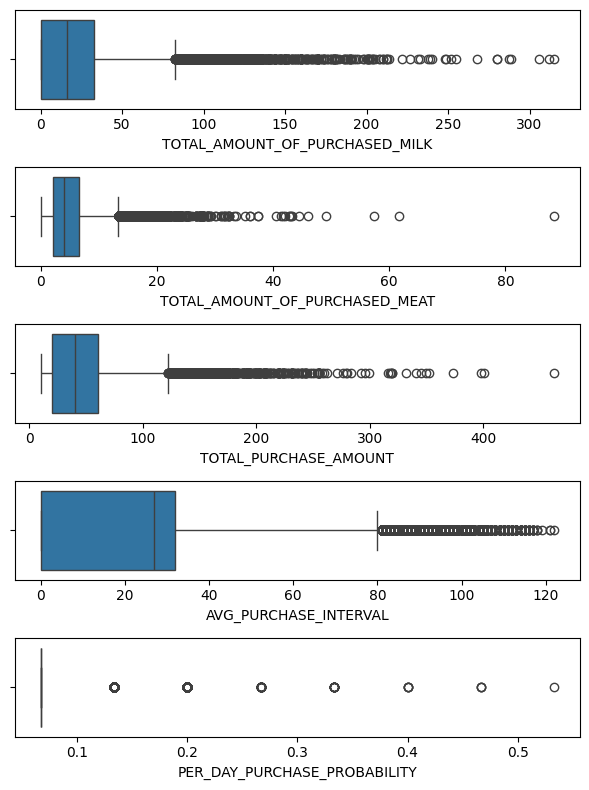

In [ ]:
# Draw Box plot using Seaborn
import seaborn as sns

# View outliers using bloxplot
fig, axes = plt.subplots(5, 1, figsize=(6,8)) # Rows: 5, Column: 1

# Plot boxplots using Seaborn
sns.boxplot(x=train_df['TOTAL_AMOUNT_OF_PURCHASED_MILK'], ax=axes[0])
sns.boxplot(x=train_df['TOTAL_AMOUNT_OF_PURCHASED_MEAT'], ax=axes[1])
sns.boxplot(x=train_df['TOTAL_PURCHASE_AMOUNT'], ax=axes[2])
sns.boxplot(x=train_df['AVG_PURCHASE_INTERVAL'], ax=axes[3])
sns.boxplot(x=train_df['PER_DAY_PURCHASE_PROBABILITY'], ax=axes[4])

plt.tight_layout()
plt.show()

In [ ]:
train_df['MEAT_PURCHASE_IN_FEB'] = train_df['MEAT_PURCHASE_IN_FEB'].astype('float32')

In [ ]:
def Remove_outliers_using_STD(df):
    outliers_index_list = []

    for col in df.columns:
        if df[col].dtypes == "float64":

            lower_limit = df[col].mean() - 3*df[col].std()
            upper_limit = df[col].mean() + 3*df[col].std()

            outlier_index = df[(df[col] < lower_limit) | (df[col] > upper_limit)].index
            outliers_index_list.extend(outlier_index.tolist())
        else:
            continue

    unique_outliers_index = list(set(outliers_index_list))
    df = df.drop(unique_outliers_index, axis="rows")
    print("Total Outliers Removed: ",  len(unique_outliers_index))
    return df

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X_fe = train_df.drop(['MEAT_PURCHASE_IN_FEB', 'NUM_OF_BOX_PURCHASE_IN_FEB', 'PER_DAY_PURCHASE_PROBABILITY', "LAST_PURCHASE_DAY", "MAGIC_KEY"], axis="columns")
y_fe = train_df['NUM_OF_BOX_PURCHASE_IN_FEB']

mutual_info = mutual_info_regression(X_fe, y_fe)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_fe.columns
mutual_info.sort_values(ascending=False)

NUM_OF_PURCHASE_IN_FEB                             0.058738
AVG_PURCHASE_INTERVAL                              0.016191
TOTAL_PURCHASE_AMOUNT                              0.012255
TOTAL_NUM_OF_PURCHASE                              0.011347
TOTAL_AMOUNT_OF_PURCHASED_MILK                     0.011278
TOTAL_NUM_OF_BOX_COUNT                             0.009797
BOX_ID                                             0.007171
TOTAL_AMOUNT_OF_PURCHASED_MEAT                     0.004343
PREMIUM_QUALITY                                    0.000888
DELIVERY_OPTION_Home Delivery - CoD                0.000000
DELIVERY_OPTION_Home Delivery - Digital Payment    0.000000
dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = train_df.drop(['MEAT_PURCHASE_IN_FEB', 'NUM_OF_PURCHASE_IN_FEB', 'NUM_OF_BOX_PURCHASE_IN_FEB', 'PER_DAY_PURCHASE_PROBABILITY', "LAST_PURCHASE_DAY", "MAGIC_KEY"], axis="columns")
y = train_df['NUM_OF_BOX_PURCHASE_IN_FEB']

order_ranked_columns = SelectKBest(f_classif, k='all')
order_ranked_features = order_ranked_columns.fit(X, y)

df_scores = pd.DataFrame(order_ranked_features.scores_, columns=['score'])
df_columns = pd.DataFrame(X.columns)
feature_rank = pd.concat([df_columns, df_scores], axis="columns")
feature_rank.sort_values("score", ascending=False)

,0,score
2,TOTAL_NUM_OF_BOX_COUNT,1168.905239
0,TOTAL_NUM_OF_PURCHASE,1148.752410
3,TOTAL_AMOUNT_OF_PURCHASED_MILK,553.259652
5,TOTAL_PURCHASE_AMOUNT,439.988081
7,DELIVERY_OPTION_Home Delivery - CoD,47.374663
4,TOTAL_AMOUNT_OF_PURCHASED_MEAT,46.128646
6,PREMIUM_QUALITY,41.524446
9,AVG_PURCHASE_INTERVAL,30.067484
8,DELIVERY_OPTION_Home Delivery - Digital Payment,29.510454
1,BOX_ID,1.955736


In [ ]:
from sklearn.feature_selection import VarianceThreshold

numerical_df = train_df.select_dtypes(include=['int', 'float'])
variance_threshold = VarianceThreshold(threshold=0.1)
variance_threshold.fit(numerical_df)
support_array = variance_threshold.get_support()
constant_columns = numerical_df.columns[~support_array]
print("Constant columns:", constant_columns)

Constant columns: Index(['DELIVERY_OPTION_Home Delivery - CoD',
       'DELIVERY_OPTION_Home Delivery - Digital Payment',
       'NUM_OF_PURCHASE_IN_FEB', 'NUM_OF_BOX_PURCHASE_IN_FEB',
       'PER_DAY_PURCHASE_PROBABILITY'],
      dtype='object')


<a id="1"></a> <br>

# <div style="background-color:#000; color:cyan; padding:15px; font-size:25px; font-family: sans-serif; text-align:left; border-radius:20px;">Modeling 🤖</div>


In [ ]:
train_dataset = train_df.copy()
test_dataset = test_df.copy()

train_dataset.head()

,MAGIC_KEY,TOTAL_NUM_OF_PURCHASE,LAST_PURCHASE_DAY,BOX_ID,TOTAL_NUM_OF_BOX_COUNT,TOTAL_AMOUNT_OF_PURCHASED_MILK,TOTAL_AMOUNT_OF_PURCHASED_MEAT,TOTAL_PURCHASE_AMOUNT,PREMIUM_QUALITY,DELIVERY_OPTION_Home Delivery - CoD,DELIVERY_OPTION_Home Delivery - Digital Payment,AVG_PURCHASE_INTERVAL,MEAT_PURCHASE_IN_FEB,NUM_OF_PURCHASE_IN_FEB,NUM_OF_BOX_PURCHASE_IN_FEB,PER_DAY_PURCHASE_PROBABILITY
0,249670911D8,1,2018-11-01,245,1,0.0,2.4,13.96,0,0,0,0,0.0,1.0,1.0,0.066667
5,2497E36D1BF,1,2018-10-11,37,1,12.0,2.2,15.98,1,1,0,0,1.3,1.0,1.0,0.066667
8,2498CA210F2,1,2018-12-06,246,1,0.0,2.5,13.96,0,0,0,0,2.5,1.0,1.0,0.066667
10,249BD4201E6,1,2019-01-14,108,1,0.0,3.6,15.96,1,0,0,0,4.0,1.0,1.0,0.066667
15,249DA1DC108,1,2019-01-02,255,1,0.0,3.6,15.96,0,0,0,0,3.6,1.0,1.0,0.066667


In [ ]:
# Train Test Split

y = train_dataset['NUM_OF_BOX_PURCHASE_IN_FEB']
X = train_dataset.drop(['MEAT_PURCHASE_IN_FEB', 'PER_DAY_PURCHASE_PROBABILITY', 'NUM_OF_PURCHASE_IN_FEB', "NUM_OF_BOX_PURCHASE_IN_FEB", 'DELIVERY_OPTION_Home Delivery - CoD', 'DELIVERY_OPTION_Home Delivery - Digital Payment', 'MAGIC_KEY', 'LAST_PURCHASE_DAY'], axis="columns")

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)

X_log = log_transformer.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X_log)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred )

#  RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

print("Linear Regression:")
print("Train R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

Linear Regression:
Train R-squared: 0.05505757966837088
Validation R-squared: 0.057344018160957466
Train RMSE: 0.12773806129513512
Validation RMSE: 0.13021325555935276


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.01, max_depth= 5, n_estimators= 400, subsample= 0.8)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_val_pred = xgb.predict(X_val)

# Calculate R-Squared Score
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred )

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

print("XGB Regressor: ")
print("Train R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

XGB Regressor: 
Train R-squared: 0.2589690295015574
Validation R-squared: 0.18221848021960163
Train RMSE: 0.11311907032799719
Validation RMSE: 0.12128224554502957


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.00001)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_val_pred = lasso_model.predict(X_val)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

print("Lasso Regression:")
print("Train R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

Lasso Regression:
Train R-squared: 0.05466371227639055
Validation R-squared: 0.05768798445361867
Train RMSE: 0.12776468017389878
Validation RMSE: 0.13018949659630205


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=20)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_val_pred = ridge_model.predict(X_val)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

print("Ridge Regression:")
print("Train R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

Ridge Regression:
Train R-squared: 0.054962898504140933
Validation R-squared: 0.0575880113880507
Train RMSE: 0.12774446067204795
Validation RMSE: 0.13019640253492426


In [ ]:
final_model = XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 3, n_estimators= 200, subsample= 1.0)
final_model.fit(X_scaled, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
test_dataset_for_pred = test_dataset.drop(['MAGIC_KEY', 'DELIVERY_OPTION_Home Delivery - CoD', 'DELIVERY_OPTION_Home Delivery - Digital Payment', 'LAST_PURCHASE_DAY'], axis="columns")

log_trans = FunctionTransformer(np.log1p)
test_dataset_log = log_trans.fit_transform(test_dataset_for_pred)
scaler = StandardScaler()
test_dataset_scaled = scaler.fit_transform(test_dataset_log)

predictions = final_model.predict(test_dataset_scaled)
test_dataset['PRED'] = predictions
test_dataset.head()

,MAGIC_KEY,TOTAL_NUM_OF_PURCHASE,LAST_PURCHASE_DAY,BOX_ID,TOTAL_NUM_OF_BOX_COUNT,TOTAL_AMOUNT_OF_PURCHASED_MILK,TOTAL_AMOUNT_OF_PURCHASED_MEAT,TOTAL_PURCHASE_AMOUNT,PREMIUM_QUALITY,DELIVERY_OPTION_Home Delivery - CoD,DELIVERY_OPTION_Home Delivery - Digital Payment,AVG_PURCHASE_INTERVAL,PRED
0,2499B9E0C1C,3,2019-02-18,90.0,3.0,30.5,0.0,37.14,1,0,0,8,1.044893
1,24D1CF7CA25,2,2019-02-21,230.0,2.0,16.8,0.0,20.28,0,0,0,10,1.031480
2,24D279F5F06,1,2018-10-03,118.0,1.0,8.0,1.3,15.98,1,0,0,0,1.007923
3,27D86DD37C9,3,2018-12-22,163.0,3.0,31.0,6.2,67.94,1,0,0,37,1.007142
4,28CF0640F8B,4,2019-02-25,238.0,4.0,43.1,4.4,60.88,0,0,0,33,0.999831


In [ ]:
test_dataset['BOX_ID'] = test_dataset['BOX_ID'].astype(int)
boxes_with_meat = boxes[['BOX_ID', 'MEAT']]
test_dataset_merge = pd.merge(test_dataset, boxes_with_meat, on='BOX_ID')
test_dataset_merge.shape

(5379, 14)

In [ ]:
test_dataset_merge['MEAT'] = test_dataset_merge['MEAT'] * test_dataset_merge['PRED']

submission_dataset = test_dataset_merge[['MAGIC_KEY', 'MEAT']]

In [ ]:
submission_dataset.to_csv('Problem3_Submission_Final.csv', index=False)